<a href="https://colab.research.google.com/github/luizftoledo/analise_negativas/blob/main/Pedidos_negados_com_base_no_artigo_31_da_Lei_de_Acesso_%C3%A0_Informa%C3%A7%C3%A3o_(informa%C3%A7%C3%A3o_pessoal_%7C_%22at%C3%A9_100_anos_de_sigilo%22).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 100 anos de sigilo: baixar dados sobre pedidos negados pelo governo federal por conter informação pessoal


Esta análise de dados baixa e cria planilha atualizada com todos os pedidos de informação feitos ao governo federal e negados **com base no artigo 31 da Lei de Acesso à Informação**, que prevê negativa de acesso porque o dado pedido contém algum tipo de `informação pessoal`. Este tipo de negativa também ficou conhecida como `100 anos de sigilo`, já que este é o prazo previsto na [lei](https://www.jusbrasil.com.br/busca?q=art.+31+da+lei+12527%2F11#:~:text=31.,%C3%A0s%20liberdades%20e%20garantias%20individuais.) para liberar informações deste tipo.

### Metodologia

Base de dados utilizada: [CGU](http://www.consultaesic.cgu.gov.br/busca/_layouts/15/DownloadPedidos/DownloadDados.aspx), Controladoria-Geral da União, o órgão responsável por monitorar o cumprimento da LAI no Brasil. A base de dados contém todos os pedidos de informação registrados por meio da LAI de 2015 a 2023 ao governo federal.


In [1]:
!pip install wget
import wget
import pandas as pd
import time
from datetime import date
import datetime
import ssl
import pandas as pd

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=588b84a2ecda61c6a0af9b1aa438898f557edfe70c926947979fce439e95b7a6
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [2]:
pedidos2024 ='https://dadosabertos-download.cgu.gov.br/FalaBR/Arquivos_FalaBR_Filtrado/Arquivos_csv_2024.zip'
pedidos2023 ='https://dadosabertos-download.cgu.gov.br/FalaBR/Arquivos_FalaBR_Filtrado/Arquivos_csv_2023.zip'
pedidos2022 ='https://dadosabertos-download.cgu.gov.br/FalaBR/Arquivos_FalaBR_Filtrado/Arquivos_csv_2022.zip'
pedidos2021 ='https://dadosabertos-download.cgu.gov.br/FalaBR/Arquivos_FalaBR_Filtrado/Arquivos_csv_2021.zip'
pedidos2020 ='https://dadosabertos-download.cgu.gov.br/FalaBR/Arquivos_FalaBR_Filtrado/Arquivos_csv_2020.zip'
pedidos2019 ='https://dadosabertos-download.cgu.gov.br/FalaBR/Arquivos_FalaBR_Filtrado/Arquivos_csv_2019.zip'
pedidos2018 ='https://dadosabertos-download.cgu.gov.br/FalaBR/Arquivos_FalaBR_Filtrado/Arquivos_csv_2018.zip'
pedidos2017 ='https://dadosabertos-download.cgu.gov.br/FalaBR/Arquivos_FalaBR_Filtrado/Arquivos_csv_2017.zip'
pedidos2016 ='https://dadosabertos-download.cgu.gov.br/FalaBR/Arquivos_FalaBR_Filtrado/Arquivos_csv_2016.zip'
pedidos2015 ='https://dadosabertos-download.cgu.gov.br/FalaBR/Arquivos_FalaBR_Filtrado/Arquivos_csv_2015.zip'


wget.download(pedidos2024)
wget.download(pedidos2023)
wget.download(pedidos2022)
wget.download(pedidos2021)
wget.download(pedidos2020)
wget.download(pedidos2019)
wget.download(pedidos2018)
wget.download(pedidos2017)
wget.download(pedidos2016)
wget.download(pedidos2015)

# importing required modules
from zipfile import ZipFile


for i in range(2015, 2025):
  # specifying the zip file name
  file_name = f"Arquivos_csv_{i}.zip"

  # opening the zip file in READ mode
  with ZipFile(file_name, 'r') as zip:
      # printing all the contents of the zip file
      zip.printdir()

      # extracting all the files
      print('Extracting all the files now...')
      zip.extractall()
      print('Done!')



File Name                                             Modified             Size
20240214_PedidosLinkArquivo_csv_2015.csv       2024-02-14 03:06:54     29211196
20240214_Pedidos_csv_2015.csv                  2024-02-14 03:01:48    244538940
20240214_RecursosLinkArquivo_csv_2015.csv      2024-02-14 03:07:02      3662398
20240214_Recursos_csv_2015.csv                 2024-02-14 03:04:06     28452682
20240214_SolicitantesPedidos_csv_2015.csv      2024-02-14 03:05:28      7188100
20240214_SolicitantesRecursos_csv_2015.csv     2024-02-14 03:06:32       506170
Extracting all the files now...
Done!
File Name                                             Modified             Size
20240214_PedidosLinkArquivo_csv_2016.csv       2024-02-14 03:14:36     33464284
20240214_Pedidos_csv_2016.csv                  2024-02-14 03:10:10    287424896
20240214_RecursosLinkArquivo_csv_2016.csv      2024-02-14 03:14:44      4180244
20240214_Recursos_csv_2016.csv                 2024-02-14 03:12:12     35307306
20

In [3]:
!pip install pytz
from datetime import datetime
import pytz

# Definir o fuso horário para o horário de Brasília
fuso_horario = pytz.timezone('America/Sao_Paulo')

# Obter a data e hora atual no fuso horário de Brasília
agora = datetime.now(fuso_horario)

# Formatar o nome do arquivo
nome_arquivo = f"{agora.year}{agora.month:02d}{agora.day:02d}"

print("Nome do arquivo:", nome_arquivo)



Nome do arquivo: 20240214


In [4]:
# baixando os 8 anos e juntando em um arquivo só


textos_2015 = pd.read_csv(f"/content/{nome_arquivo}_Pedidos_csv_2015.csv",sep=";",
                          header = None,
                        names=['id',
                               'protocolo',
                               'esfera',
                               'orgao',
                               'status',
                               'data_pedido',
                               'resumo',
                               'texto_pedido',
                               'data_registro',
                               'foi_prorrogado',
                               'foi_encaminhado',
                               'forma_resposta',
                               'forma_pedido',
                               'numero',
                               'categoria_pedido',
                               'descricao_geral',
                               'quem_respondeu',
                               'sub_assunto',
                               'texto_resposta',
                               'decisao',
                               'motivo_decisao',
                              ], encoding='UTF-16')

textos_2016 = pd.read_csv(f"/content/{nome_arquivo}_Pedidos_csv_2016.csv",sep=";",
                          header = None,
                        names=['id',
                               'protocolo',
                               'esfera',
                               'orgao',
                               'status',
                               'data_pedido',
                               'resumo',
                               'texto_pedido',
                               'data_registro',
                               'foi_prorrogado',
                               'foi_encaminhado',
                               'forma_resposta',
                               'forma_pedido',
                               'numero',
                               'categoria_pedido',
                               'descricao_geral',
                               'quem_respondeu',
                               'sub_assunto',
                               'texto_resposta',
                               'decisao',
                               'motivo_decisao',
                              ],
                        encoding='UTF-16')




textos_2017 = pd.read_csv(f"/content/{nome_arquivo}_Pedidos_csv_2017.csv",sep=";",
                          header = None,
                        names=['id',
                               'protocolo',
                               'esfera',
                               'orgao',
                               'status',
                               'data_pedido',
                               'resumo',
                               'texto_pedido',
                               'data_registro',
                               'foi_prorrogado',
                               'foi_encaminhado',
                               'forma_resposta',
                               'forma_pedido',
                               'numero',
                               'categoria_pedido',
                               'descricao_geral',
                               'quem_respondeu',
                               'sub_assunto',
                               'texto_resposta',
                               'decisao',
                               'motivo_decisao',
                              ],
                        encoding='UTF-16')




textos_2018 = pd.read_csv(f"/content/{nome_arquivo}_Pedidos_csv_2018.csv",sep=";",
                          header = None,
                        names=['id',
                               'protocolo',
                               'esfera',
                               'orgao',
                               'status',
                               'data_pedido',
                               'resumo',
                               'texto_pedido',
                               'data_registro',
                               'foi_prorrogado',
                               'foi_encaminhado',
                               'forma_resposta',
                               'forma_pedido',
                               'numero',
                               'categoria_pedido',
                               'descricao_geral',
                               'quem_respondeu',
                               'sub_assunto',
                               'texto_resposta',
                               'decisao',
                               'motivo_decisao',
                              ],
                        encoding='UTF-16')




textos_2019 = pd.read_csv(f"/content/{nome_arquivo}_Pedidos_csv_2019.csv",sep=";",
                          header = None,
                        names=['id',
                               'protocolo',
                               'esfera',
                               'orgao',
                               'status',
                               'data_pedido',
                               'resumo',
                               'texto_pedido',
                               'data_registro',
                               'foi_prorrogado',
                               'foi_encaminhado',
                               'forma_resposta',
                               'forma_pedido',
                               'numero',
                               'categoria_pedido',
                               'descricao_geral',
                               'quem_respondeu',
                               'sub_assunto',
                               'texto_resposta',
                               'decisao',
                               'motivo_decisao',
                              ],
                        encoding='UTF-16')


textos_2020 = pd.read_csv(f"/content/{nome_arquivo}_Pedidos_csv_2020.csv",sep=";",
                          header = None,
                        names=['id',
                               'protocolo',
                               'esfera',
                               'orgao',
                               'status',
                               'data_pedido',
                               'resumo',
                               'texto_pedido',
                               'data_registro',
                               'foi_prorrogado',
                               'foi_encaminhado',
                               'forma_resposta',
                               'forma_pedido',
                               'numero',
                               'categoria_pedido',
                               'descricao_geral',
                               'quem_respondeu',
                               'sub_assunto',
                               'texto_resposta',
                               'decisao',
                               'motivo_decisao',
                              ],
                        encoding='UTF-16')

textos_2021 = pd.read_csv(f"/content/{nome_arquivo}_Pedidos_csv_2021.csv",sep=";",
                          header = None,
                        names=['id',
                               'protocolo',
                               'esfera',
                               'orgao',
                               'status',
                               'data_pedido',
                               'resumo',
                               'texto_pedido',
                               'data_registro',
                               'foi_prorrogado',
                               'foi_encaminhado',
                               'forma_resposta',
                               'forma_pedido',
                               'numero',
                               'categoria_pedido',
                               'descricao_geral',
                               'quem_respondeu',
                               'sub_assunto',
                               'texto_resposta',
                               'decisao',
                               'motivo_decisao',
                              ],
                        encoding='UTF-16')


textos_2022 = pd.read_csv(f"/content/{nome_arquivo}_Pedidos_csv_2022.csv",sep=";",
                          header = None,
                        names=['id',
                               'protocolo',
                               'esfera',
                               'orgao',
                               'status',
                               'data_pedido',
                               'resumo',
                               'texto_pedido',
                               'data_registro',
                               'foi_prorrogado',
                               'foi_encaminhado',
                               'forma_resposta',
                               'forma_pedido',
                               'numero',
                               'categoria_pedido',
                               'descricao_geral',
                               'quem_respondeu',
                               'sub_assunto',
                               'texto_resposta',
                               'decisao',
                               'motivo_decisao',
                              ],
                        encoding='UTF-16')


textos_2023 = pd.read_csv(f"/content/{nome_arquivo}_Pedidos_csv_2023.csv",sep=";",
                          header = None,
                        names=['id',
                               'protocolo',
                               'esfera',
                               'orgao',
                               'status',
                               'data_pedido',
                               'resumo',
                               'texto_pedido',
                               'data_registro',
                               'foi_prorrogado',
                               'foi_encaminhado',
                               'forma_resposta',
                               'forma_pedido',
                               'numero',
                               'categoria_pedido',
                               'descricao_geral',
                               'quem_respondeu',
                               'sub_assunto',
                               'texto_resposta',
                               'decisao',
                               'motivo_decisao',
                              ], encoding='UTF-16')


textos_2024 = pd.read_csv(f"/content/{nome_arquivo}_Pedidos_csv_2024.csv",sep=";",
                          header = None,
                        names=['id',
                               'protocolo',
                               'esfera',
                               'orgao',
                               'status',
                               'data_pedido',
                               'resumo',
                               'texto_pedido',
                               'data_registro',
                               'foi_prorrogado',
                               'foi_encaminhado',
                               'forma_resposta',
                               'forma_pedido',
                               'numero',
                               'categoria_pedido',
                               'descricao_geral',
                               'quem_respondeu',
                               'sub_assunto',
                               'texto_resposta',
                               'decisao',
                               'motivo_decisao',
                              ], encoding='UTF-16')

texto_pedidos = pd.concat([textos_2015, textos_2016, textos_2017, textos_2018, textos_2019, textos_2020, textos_2021, textos_2022, textos_2023,
                          textos_2024])

texto_pedidos = texto_pedidos.rename(columns={'sub_assunto': 'ano_pedido'})

<ipython-input-4-bb68578d2ec8>:4: DtypeWarning: Columns (0,1,13) have mixed types. Specify dtype option on import or set low_memory=False.
  textos_2015 = pd.read_csv(f"/content/{nome_arquivo}_Pedidos_csv_2015.csv",sep=";",
<ipython-input-4-bb68578d2ec8>:29: DtypeWarning: Columns (0,1,13) have mixed types. Specify dtype option on import or set low_memory=False.
  textos_2016 = pd.read_csv(f"/content/{nome_arquivo}_Pedidos_csv_2016.csv",sep=";",
<ipython-input-4-bb68578d2ec8>:58: DtypeWarning: Columns (0,1,13) have mixed types. Specify dtype option on import or set low_memory=False.
  textos_2017 = pd.read_csv(f"/content/{nome_arquivo}_Pedidos_csv_2017.csv",sep=";",
<ipython-input-4-bb68578d2ec8>:87: DtypeWarning: Columns (0,1,13) have mixed types. Specify dtype option on import or set low_memory=False.
  textos_2018 = pd.read_csv(f"/content/{nome_arquivo}_Pedidos_csv_2018.csv",sep=";",
<ipython-input-4-bb68578d2ec8>:116: DtypeWarning: Columns (0,1,13) have mixed types. Specify dtype op

In [5]:
# arrumando a coluna da data

texto_pedidos.data_pedido = pd.to_datetime(texto_pedidos.data_pedido, errors='coerce')
texto_pedidos['ano_pedido'] = pd.DatetimeIndex(texto_pedidos['data_pedido']).year



<ipython-input-5-0ec911ce3606>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  texto_pedidos.data_pedido = pd.to_datetime(texto_pedidos.data_pedido, errors='coerce')


In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

texto_pedidos[texto_pedidos.ano_pedido == 2024]

id          protocolo   esfera  \
1     6703198  80004000001202439  Federal   
2     6703200  01234000001202459  Federal   
3     6703201  23546000001202478  Federal   
4     6703202  23546000002202412  Federal   
5     6703206  48007000001202404  Federal   
...       ...                ...      ...   
6708  6866492  23546015411202413  Federal   
6709  6866495  18810001729202418  Federal   
6710  6866771  18830000426202431  Federal   
6711  6867720  18810001741202414  Federal   
6712  6867804  18800021915202484  Federal   

                                                                     orgao  \
1                            CBTU – Companhia Brasileira de Trens Urbanos    
2     CEITEC/S.A. – Centro Nacional de Tecnologia Eletrônica Avançada S.A.   
3                            UFPI – Fundação Universidade Federal do Piauí   
4                            UFCG – Universidade Federal de Campina Grande   
5                        CPRM – Companhia de Pesquisa de Recursos Minerais   
...                                                                    ...   
6708                  FNDE – Fundo Nacional de Desenvolvimento da Educação   
6709                                       BACEN – Banco Central do Brasil   
6710                          SUSEP – Superintendência de Seguros Privados   
6711                                       BACEN – Banco Central do Brasil   
6712                            INSS – Instituto Nacional do Seguro Social   

         status data_pedido  \
1     Concluída  2024-01-01   
2     Concluída  2024-01-01   
3     Concluída  2024-01-01   
4     Concluída  2024-01-01   
5     Concluída  2024-01-01   
...         ...         ...   
6708  Concluída  2024-09-02   
6709  Concluída  2024-09-02   
6710  Concluída  2024-09-02   
6711  Concluída  2024-09-02   
6712  Concluída  2024-09-02   

                                                                                                       resumo  \
1                                                                                  Plano de Cargos e Salários   
2                                                                                  Plano de Cargos e Salários   
3     Copia do processo Processo Nº 23111.043645/2020-04, sem inclusão de dados pessoais de qualquer espécie.   
4                       Copia do Processo 23096.057679/2021-25, sem informacoes pessoais de qualquer especie.   
5                                                                                  Plano de Cargos e Salários   
...                                                                                                       ...   
6708                                                                Tratar sobre os assuntos ligado ao SIMEC.   
6709                                                ESTOU COM RESTRINÇÃO A ACESSO A CRÉDITO JUNTO AOS BANCOS    
6710                                                                                    Atualização cadastral   
6711                               quero saber as contas bancárias e de corretoras em que tenho investimentos   
6712                                                    Acesso ao Simulador de Aposentadoria, com urgência!!!   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                      texto_pedido  \
1                                                                  Solicito o Plano de Cargos e Salários da empresa, contendo:  1. Lista de cargos por nível de escolaridade,  2. Descrição dos cargos com suas atribuições,  3. Detalhamento dos critérios de progressão e promoção,  4. Estrutura salarial dos cargos por níveis,   As info

In [7]:
texto_pedidos.head(2)

,id,protocolo,esfera,orgao,status,data_pedido,resumo,texto_pedido,data_registro,foi_prorrogado,foi_encaminhado,forma_resposta,forma_pedido,numero,categoria_pedido,descricao_geral,quem_respondeu,ano_pedido,texto_resposta,decisao,motivo_decisao
0,IdPedido,ProtocoloPedido,Esfera,OrgaoDestinatario,Situacao,NaT,ResumoSolicitacao,DetalhamentoSolicitacao,PrazoAtendimento,FoiProrrogado,FoiReencaminhado,FormaResposta,OrigemSolicitacao,IdSolicitante,AssuntoPedido,SubAssuntoPedido,Tag,NaN,Resposta,Decisao,EspecificacaoDecisao
1,1887837,23480010257201512,Federal,UFPel – Fundação Universidade Federal de Pelotas,Concluída,2015-01-07,Aproveitamento,"Prezados, Gostaria de solicitar informações sobre a existência de vagas para aproveitamento na UFPEL. Busco informações sobre vagas referentes ao cargo de Técnico em Assuntos Educacionais. Existe alguma vaga em aberto para este cargo na instituição? No caso da existência da vaga, quais critérios e procedimentos necessários para a solicitação da mesma? Desde já, agradeço a atenção",21/07/2015,Não,Não,Pelo sistema (com avisos por email),Internet,2564814,Conduta Docente,,,2015.0,"Boa tarde, Em primeiro lugar, pedimos desculpas pelo atraso no envio da resposta a seu questionamento, justificado pela ocorrência da greve dos servidores públicos federais. Atendendo a sua solicitação, recebemos a seguinte resposta da Pró-Reitoria de Gestão de Pessoas: Informamos que a vaga de Técnico em Assuntos Educacionais existente já está em processo de redistribuição, restando apenas a anuência da Universidade de origem do servidor selecionado e a publicação da redistribuição junto ao MEC. Att. Biolange Piegas/Ouvidoria/e-SIC/UFPel",Acesso Concedido,Resposta solicitada inserida no Fala.Br


In [8]:
texto_pedidos[['protocolo', 'orgao', 'status', 'data_pedido', 'resumo', 'texto_resposta', 'ano_pedido', 'motivo_decisao']].to_csv('pedidos_lai_wobby.csv', index=False)

In [9]:
# filtrando informacoes pessoais
pessoais = texto_pedidos[texto_pedidos.motivo_decisao == 'Dados pessoais']
pessoais.to_csv('pessoais.csv', index=False)

In [10]:
# mudando o tipo do dado
pessoais.resumo = pessoais.resumo.astype(str)

<ipython-input-10-3ff19949720c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pessoais.resumo = pessoais.resumo.astype(str)


In [12]:
pd.set_option('display.max_columns', 500)
pessoais_2023 = pessoais[pessoais.ano_pedido == 2023]
pessoais_2023.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 514 entries, 315 to 90128
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                514 non-null    object        
 1   protocolo         514 non-null    object        
 2   esfera            514 non-null    object        
 3   orgao             514 non-null    object        
 4   status            514 non-null    object        
 5   data_pedido       514 non-null    datetime64[ns]
 6   resumo            514 non-null    object        
 7   texto_pedido      514 non-null    object        
 8   data_registro     514 non-null    object        
 9   foi_prorrogado    514 non-null    object        
 10  foi_encaminhado   514 non-null    object        
 11  forma_resposta    514 non-null    object        
 12  forma_pedido      514 non-null    object        
 13  numero            514 non-null    object        
 14  categoria_pedido  514 

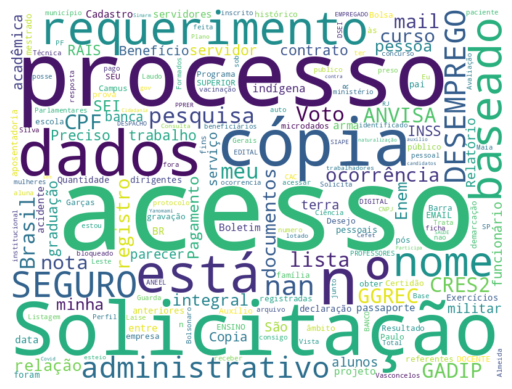

In [13]:
# nuvem de palavras do texto dos pedidos negados com base no artigo 31 em 2023

# importações para fazer a nuvem de palavras dos textos de pedidos negados
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# montando a nuvem
text = " ".join(pedido for pedido in pessoais_2023.resumo)
word_cloud = WordCloud(stopwords=['nos', 'qual', 'saber', 'desde', 'número', 'anos', 'direito', 'as', 'Prezados', 'das', 'ano', 'referente', 'Federal', 'nos', 'sistema', 'documento', 'pedido', 'qual', 'conforme',\
                                  'informação', 'Estado', 'até', 'já', 'todos', 'dia', 'informações', \
                                  'Obrigado', 'PI', 'todo', 'Lei', 'sobre', 'Boa', 'ou', 'foi', 'pois', 'sobre',\
                                  'à', 'foi', 'aos', 'se', 'é', 'uma', 'um', 'pela', 'solicitar', 'Prezado', 'por',\
                                  'na', 'os', 'como', 'Gostaria', 'ao', 'solicito', 'Solicito', 'com', 'dos', 'na',\
                                  'com', 'pelo', 'sou', 'não', 'de', 'o', 'e', 'a', 'no', 'do', 'que', 'da', 'em', 'para'], width=800, height=600, collocations = False, background_color = 'white').generate(text)



plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('nuvem_auxilio.png', dpi=1000)
plt.show()

In [14]:
plt.savefig('nuvem_auxilio.png', dpi=1000)


<Figure size 640x480 with 0 Axes>

In [15]:
# Planilha com pedidos negados por conter dados pessoais, de 2015 a 2022

pessoais.tail(1)

,id,protocolo,esfera,orgao,status,data_pedido,resumo,texto_pedido,data_registro,foi_prorrogado,foi_encaminhado,forma_resposta,forma_pedido,numero,categoria_pedido,descricao_geral,quem_respondeu,ano_pedido,texto_resposta,decisao,motivo_decisao
6314,6840017,18800014831202494,Federal,INSS – Instituto Nacional do Seguro Social,Concluída,2024-03-02,COM BASE NO DESPACHO DECISÓRIO Nº 1/2024/FIS/CGF Processo nº 00261.001888/2023-21,"POR MEIO DESSE VEM MUI RESPEITOSAMENTE SOLICITAR DO INSS- QUANTO AO DESPACHO ACIMA MNCIONADO SE MEUS DADOS FORAM VAZADOS, SOLICITO O RELATÓRIO COM NADA CONSTA.",26/02/2024,Não,Não,Pelo sistema (com avisos por email),Internet,928181,Acesso à informação,Conformidade e Lei Geral de Proteção de Dados,,2024.0,"Prezado senhor, Primeiramente, esclarecemos que a solicitação de dados pessoais, por meio desse canal, depende da comprovação da identificação do requerente, por meio da autenticação de selo prata ou ouro. As informações relativas aos segurados do Regime Geral de Previdência Social que constam no Cadastro Nacional de Informações Sociais – CNIS, são pessoais (inciso IV do art. 4º da LAI) e não podem ser fornecidas ou tratadas de forma irrestrita, de acordo o disposto no § 1º do art. 31 da LAI, a seguir transcrito: Art. 31. O tratamento das deve ser feito de forma transparente e com respeito à intimidade, vida privada, honra e imagem das pessoas, bem como às liberdades e garantias individuais. § 1o As informações pessoais, a que se refere este artigo, relativas à intimidade, vida privada, honra e imagem: I - terão seu acesso restrito, independentemente de classificação de sigilo e pelo prazo máximo de 100 (cem) anos a contar da sua data de produção, a agentes públicos legalmente autorizados e à pessoa a que elas se referirem, e II - poderão ter autorizada sua divulgação ou acesso por terceiros diante de previsão legal ou consentimento expresso da pessoa a que elas se referirem. Ademais, se verifica pelo Despacho Decisório nº 1/2024/FIS/CGF que: 1. O Despacho foi proferido em 31/01/2024, e que o INSS possui o prazo de 10(dez) dias úteis para apresentar. Ou seja, não houve o trânsito em julgado. 2. Os usuário receberão a mensagem no aplicativo Meu INSS, no menu notificações . Portanto, sugerimos que aguarde o trânsito em julgado e o cumprimento da decisão pelo INSS no prazo establecido pela ANPD. Salientamos, finalmente, que o Serviço de Informações ao Cidadão não substitui os canais de atendimento do INSS e foi criado como ferramenta para obtenção de informações públicas com base na Lei de Acesso à Informação – LAI. Atenciosamente, Coordenação do Serviço de Informações ao Cidadão – INSS",Acesso Negado,Dados pessoais


In [16]:
# outros tipos de negativas

texto_pedidos.decisao.value_counts()

Acesso Concedido                                            563135
Não se trata de solicitação de informação                    61950
Acesso Negado                                                52271
Acesso Parcialmente Concedido                                40173
Informação Inexistente                                       28250
Órgão não tem competência para responder sobre o assunto     24263
Pergunta Duplicada/Repetida                                  17418
Decisao                                                         10
Name: decisao, dtype: int64

# Para gerar uma planilha no Google Spreadsheet (atenção: um popup vai pedir autorização para usar o seu Google Drive)

In [20]:
# agora vamos jogar os dados no google spreadsheet. importar bibliotecas necessárias
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [21]:
# salvar arquivo info pessoal em uma planilha google spreadsheet


#date
from datetime import date

today = date.today()

# create, and save df
from gspread_dataframe import set_with_dataframe
title = f'Atualizada em {today}. Negados com base no artigo 31 da LAI até agora. Fonte: Data Fixers/CGU'
gc.create(title)  # if not exist
sheet = gc.open(title).sheet1
set_with_dataframe(sheet, pessoais)
# include_index=False, include_column_header=True, resize=False
sh = gc.open(f'Atualizada em {today}. Negados com base no artigo 31 da LAI até agora. Fonte: Data Fixers/CGU')


In [22]:
# link para o spreadsheet

link = sh.id
link_final = 'https://docs.google.com/spreadsheets/d/' + link
print(link_final)

https://docs.google.com/spreadsheets/d/1MT6Otcg-6URYC6BYyQ74tLqgJSBfLej3e8qSPHROjeU


In [17]:
pessoais.orgao.value_counts().head(50)

CEF – Caixa Econômica Federal                                                         1472
INSS – Instituto Nacional do Seguro Social                                            1083
PF – Polícia Federal                                                                   584
MF - Ministério da Fazenda                                                             504
ANEEL – Agência Nacional de Energia Elétrica                                           369
MTE - Ministério do Trabalho e Emprego                                                 308
MS – Ministério da Saúde                                                               270
MPS - Ministério da Previdência Social                                                 209
PRF – Polícia Rodoviária Federal                                                       175
CEX – Comando do Exército                                                              141
FUNAI – Fundação Nacional dos Povos Indígenas                                          112

Comparando o ano de 2023 com outros anos

In [18]:
pessoais.ano_pedido.value_counts().reset_index(name='negativas_art_31').sort_values('index')

,index,negativas_art_31
0,2015.0,1155
6,2016.0,638
2,2017.0,1029
1,2018.0,1062
4,2019.0,897
3,2020.0,1021
5,2021.0,809
8,2022.0,509
7,2023.0,514
9,2024.0,52


In [ ]:
texto_pedidos.head(1)

,id,protocolo,esfera,orgao,status,data_pedido,resumo,texto_pedido,data_registro,foi_prorrogado,foi_encaminhado,forma_resposta,forma_pedido,numero,categoria_pedido,descricao_geral,quem_respondeu,ano_pedido,texto_resposta,decisao,motivo_decisao
0,IdPedido,ProtocoloPedido,Esfera,OrgaoDestinatario,Situacao,NaT,ResumoSolicitacao,DetalhamentoSolicitacao,PrazoAtendimento,FoiProrrogado,FoiReencaminhado,FormaResposta,OrigemSolicitacao,IdSolicitante,AssuntoPedido,SubAssuntoPedido,Tag,NaN,Resposta,Decisao,EspecificacaoDecisao


In [ ]:
texto_pedidos_teste = texto_pedidos.copy()

In [ ]:
texto_pedidos_teste.decisao.value_counts()

Acesso Concedido                                            562259
Não se trata de solicitação de informação                    61912
Acesso Negado                                                52196
Acesso Parcialmente Concedido                                40102
Informação Inexistente                                       28217
Órgão não tem competência para responder sobre o assunto     24249
Pergunta Duplicada/Repetida                                  17406
Decisao                                                         10
Name: decisao, dtype: int64

In [ ]:
import pandas as pd
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stopwords = set(stopwords.words('portuguese'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def preprocess_text(text):
    # Remover caracteres especiais e pontuação
    text = re.sub(r'[^\w\s]', '', text.lower())
    # Tokenizar o texto em palavras
    tokens = text.split()
    # Remover stopwords
    tokens = [token for token in tokens if token not in stopwords]
    # Unir as palavras novamente em um texto pré-processado
    processed_text = ' '.join(tokens)
    return processed_text


In [ ]:
import pandas as pd
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stopwords = set(stopwords.words('portuguese'))
additional_stopwords = ['gostaria', 'solicito', 'informações', 'sobre', 'saber', 'acesso', 'dados', 'informação', 'processo', 'número', 'lei', 'desde']
stopwords.update(additional_stopwords)

def preprocess_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^\w\s]', '', text.lower())
        tokens = text.split()
        tokens = [token for token in tokens if token not in stopwords]
        processed_text = ' '.join(tokens)
        return processed_text
    else:
        return ''

categories = texto_pedidos['decisao'].unique()
results = {}

for category in categories:
    texts = texto_pedidos.loc[texto_pedidos['decisao'] == category, 'texto_pedido']
    preprocessed_texts = [preprocess_text(text) for text in texts]
    combined_text = ' '.join(preprocessed_texts)
    word_counts = Counter(combined_text.split())
    top_words = word_counts.most_common(20)
    results[category] = [word for word, count in top_words]

for category, words in results.items():
    print(f'Categoria: {category}')
    print(f'Palavras mais associadas: {", ".join(words)}')
    print()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Categoria: Decisao
Palavras mais associadas: detalhamentosolicitacao

Categoria: Acesso Concedido
Palavras mais associadas: nº, caso, quais, prezados, federal, 1, instituição, ano, 2, dia, solicitar, boa, agradeço, pesquisa, universidade, anos, cópia, empresa, contrato, 3

Categoria: Pergunta Duplicada/Repetida
Palavras mais associadas: nº, caso, quais, órgão, federal, 1, 2, ano, pedido, documentos, prezados, anos, contrato, ministério, todos, resposta, favor, cada, empresa, pesquisa

Categoria: Acesso Parcialmente Concedido
Palavras mais associadas: nº, ano, 1, federal, quais, 2, anos, caso, cada, brasil, solicitar, período, 3, ministério, seguintes, prezados, quantidade, pesquisa, data, agradeço

Categoria: Acesso Negado
Palavras mais associadas: nº, cópia, prezados, federal, caso, documentos, todos, solicitar, ano, brasil, empresa, contrato, dia, pedido, data, 1, anos, ministério, nome, art

Categoria: Não se trata de solicitação de informação
Palavras mais associadas: auxílio, dia,

# Quais palavras estão mais associadas a uma negativa?

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams

nltk.download('stopwords')
stopwords = set(stopwords.words('portuguese'))
additional_stopwords = ['gostaria', 'solicito', 'informações', 'sobre', 'saber', 'acesso', 'dados', 'informação', 'processo', 'número', 'lei', 'desde']
stopwords.update(additional_stopwords)

def preprocess_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^\w\s]', '', text.lower())
        tokens = text.split()
        tokens = [token for token in tokens if token not in stopwords]
        return tokens
    else:
        return []

# Função para exibir o progresso de leitura do DataFrame
def show_progress(current, total):
    print(f"Linhas lidas: {current}/{total}, Faltam: {total-current}")


# Filtrar o DataFrame apenas para os pedidos classificados como "Acesso Negado"
acesso_negado_df = texto_pedidos[texto_pedidos['decisao'] == 'Acesso Negado']

# Obter a lista de órgãos únicos que tiveram Acesso Negado
orgaos_unicos = acesso_negado_df['orgao'].unique()

results = []

total_rows = len(orgaos_unicos)
current_row = 0

for orgao in orgaos_unicos:
    orgao_df = acesso_negado_df[acesso_negado_df['orgao'] == orgao]
    texts = orgao_df['texto_pedido']
    preprocessed_texts = [preprocess_text(text) for text in texts]
    trigram_counts = nltk.FreqDist(ngrams([word for words in preprocessed_texts for word in words], 3))  # Trigramas
    top_trigrams = trigram_counts.most_common(20)
    trigrams = [trigram for trigram, count in top_trigrams]
    results.append({'Orgao': orgao, 'Trigramas': trigrams})

    current_row += 1
    show_progress(current_row, total_rows)

df_trigramas = pd.DataFrame(results)

df_trigramas


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Linhas lidas: 1/300, Faltam: 299
Linhas lidas: 2/300, Faltam: 298
Linhas lidas: 3/300, Faltam: 297
Linhas lidas: 4/300, Faltam: 296
Linhas lidas: 5/300, Faltam: 295
Linhas lidas: 6/300, Faltam: 294
Linhas lidas: 7/300, Faltam: 293
Linhas lidas: 8/300, Faltam: 292
Linhas lidas: 9/300, Faltam: 291
Linhas lidas: 10/300, Faltam: 290
Linhas lidas: 11/300, Faltam: 289
Linhas lidas: 12/300, Faltam: 288
Linhas lidas: 13/300, Faltam: 287
Linhas lidas: 14/300, Faltam: 286
Linhas lidas: 15/300, Faltam: 285
Linhas lidas: 16/300, Faltam: 284
Linhas lidas: 17/300, Faltam: 283
Linhas lidas: 18/300, Faltam: 282
Linhas lidas: 19/300, Faltam: 281
Linhas lidas: 20/300, Faltam: 280
Linhas lidas: 21/300, Faltam: 279
Linhas lidas: 22/300, Faltam: 278
Linhas lidas: 23/300, Faltam: 277
Linhas lidas: 24/300, Faltam: 276
Linhas lidas: 25/300, Faltam: 275
Linhas lidas: 26/300, Faltam: 274
Linhas lidas: 27/300, Faltam: 273
Linhas lidas: 28/300, Faltam: 272
Linhas lidas: 29/300, Faltam: 271
Linhas lidas: 30/300, F

,Orgao,Trigramas
0,CEF – Caixa Econômica Federal,"[(caixa, econômica, federal), (caixa, economica, federal), (técnico, bancário, novo), (plano, apoio, aposentadoria), (programa, casa, vida), (cargo, técnico, bancário), (venho, meio, deste), (quantidade, funcionários, ocupavam), (funcionários, ocupavam, cargo), (ocupavam, cargo, gerencia), (cargo, gerencia, ano), (respeitosamente, contrato, patrocínio), (contrato, patrocínio, projeto), (patrocínio, projeto, futebol), (projeto, futebol, caixa), (futebol, caixa, econômica), (meio, deste, solicitar), (paa, plano, apoio), (apoio, aposentadoria, paa), (preciso, numero, pis)]"
1,ANTAQ – Agência Nacional de Transportes Aquaviários,"[(prezados, boa, tarde), (termos, pede, deferimento), (cópia, integral, nº), (gallotti, advogados, associados), (cópia, integral, autos), (prezados, bom, dia), (requerer, cópia, integral), (nestes, termos, pede), (boa, tarde, gentileza), (cópia, integral, administrativo), (solicitar, cópia, integral), (atenciosamente, fernanda, jardim), (integral, administrativo, nº), (auto, infração, nº), (inteiro, teor, nº), (vem, requerer, cópia), (bom, dia, gentileza), (atenciosamente, andré, seixas), (controle, social, administração), (social, administração, pública)]"
2,MAPA - Ministério da Agricultura e Pecuária,"[(agricultura, pecuária, abastecimento), (ministério, agricultura, pecuária), (prezados, boa, tarde), (produtos, origem, animal), (termos, lai, obter), (lai, obter, seguintes), (obter, seguintes, detalhes), (seguintes, detalhes, correspondência), (detalhes, correspondência, oficial), (correspondência, oficial, oficial), (oficial, oficial, representantes), (conseguir, liberar, registros), (liberar, registros, selecionados), (informe, quê, obrigada), (prezadoa, srsra, termos), (srsra, termos, lai), (oficial, representantes, itamaraty), (representantes, itamaraty, membros), (itamaraty, membros, serviço), (membros, serviço, diplomático)]"
3,INSS – Instituto Nacional do Seguro Social,"[(artigo, 11, parágrafo), (instituto, nacional, seguro), (nacional, seguro, social), (últimos, 5, anos), (fundamento, 125272011, públicas), (requerer, eventualmente, cópia), (eventualmente, cópia, 20), (cópia, 20, dias), (20, dias, corridos), (dias, corridos, artigo), (corridos, artigo, 11), (fornecidas, formato, digital), (formato, digital, disponíveis), (digital, disponíveis, conforme), (disponíveis, conforme, estabelece), (conforme, estabelece, artigo), (estabelece, artigo, 11), (125272011, eventualidade, solicitadas), (eventualidade, solicitadas, serem), (solicitadas, serem, fornecidas)]"
4,"ANP – Agência Nacional do Petróleo, Gás Natural e Biocombustíveis","[(prezados, boa, tarde), (boa, tarde, solicitar), (melhor, compreensão, rd), (proposta, ação, nº), (obrigada, prezados, boa), (tarde, solicitar, proposta), (solicitar, proposta, ação), (petróleo, gás, natural), (boa, tarde, ter), (bom, dia, ter), (agência, nacional, petróleo), (gás, natural, biocombustíveis), (nacional, petróleo, gás), (prezados, bom, dia), (prezados, ter, documento), (data, registro, dia), (nota, técnica, nº), (solicitar, nota, técnica), (sep, melhor, compreensão), (tarde, solicitar, nota)]"
...,...,...
295,NAV Brasil Serviços de Navegação Aérea S.A,"[(joyce, queiroz, silva), (tiago, fernando, musetti), (prezadoa, dirigente, estudante), (dirigente, estudante, mba), (estudante, mba, data), (mba, data, science), (data, science, analytics), (science, analytics, usp), (analytics, usp, esalq), (usp, esalq, contar), (esalq, contar, colaboração), (contar, colaboração, pesquisa), (colaboração, pesquisa, trabalho), (pesquisa, trabalho, conclusão), (trabalho, conclusão, curso), (conclusão, curso, objetivo), (curso, objetivo, pesquisa), (objetivo, pesquisa, avaliar), (pesquisa, avaliar, nível), (avaliar, nível, maturidade)]"
296,"IFRR – Instituto Federal de Educação, Ciência e Tecnologia de Roraima","[(cadastrar, cnpj, mei), (cnpj, mei, cpf), (mei, cpf, correto)]"
297,EBSERH - HC-UFU - Hospital de Clínicas de Uberlând

In [ ]:
pd.set_option('display.max_colwidth', 1000)
df_trigramas.head(30)



,Orgao,Trigramas
0,CEF – Caixa Econômica Federal,"[(caixa, econômica, federal), (caixa, economica, federal), (técnico, bancário, novo), (plano, apoio, aposentadoria), (programa, casa, vida), (cargo, técnico, bancário), (venho, meio, deste), (quantidade, funcionários, ocupavam), (funcionários, ocupavam, cargo), (ocupavam, cargo, gerencia), (cargo, gerencia, ano), (respeitosamente, contrato, patrocínio), (contrato, patrocínio, projeto), (patrocínio, projeto, futebol), (projeto, futebol, caixa), (futebol, caixa, econômica), (meio, deste, solicitar), (paa, plano, apoio), (apoio, aposentadoria, paa), (preciso, numero, pis)]"
1,ANTAQ – Agência Nacional de Transportes Aquaviários,"[(prezados, boa, tarde), (termos, pede, deferimento), (cópia, integral, nº), (gallotti, advogados, associados), (cópia, integral, autos), (prezados, bom, dia), (requerer, cópia, integral), (nestes, termos, pede), (boa, tarde, gentileza), (cópia, integral, administrativo), (solicitar, cópia, integral), (atenciosamente, fernanda, jardim), (integral, administrativo, nº), (auto, infração, nº), (inteiro, teor, nº), (vem, requerer, cópia), (bom, dia, gentileza), (atenciosamente, andré, seixas), (controle, social, administração), (social, administração, pública)]"
2,MAPA - Ministério da Agricultura e Pecuária,"[(agricultura, pecuária, abastecimento), (ministério, agricultura, pecuária), (prezados, boa, tarde), (produtos, origem, animal), (termos, lai, obter), (lai, obter, seguintes), (obter, seguintes, detalhes), (seguintes, detalhes, correspondência), (detalhes, correspondência, oficial), (correspondência, oficial, oficial), (oficial, oficial, representantes), (conseguir, liberar, registros), (liberar, registros, selecionados), (informe, quê, obrigada), (prezadoa, srsra, termos), (srsra, termos, lai), (oficial, representantes, itamaraty), (representantes, itamaraty, membros), (itamaraty, membros, serviço), (membros, serviço, diplomático)]"
3,INSS – Instituto Nacional do Seguro Social,"[(artigo, 11, parágrafo), (instituto, nacional, seguro), (nacional, seguro, social), (últimos, 5, anos), (fundamento, 125272011, públicas), (requerer, eventualmente, cópia), (eventualmente, cópia, 20), (cópia, 20, dias), (20, dias, corridos), (dias, corridos, artigo), (corridos, artigo, 11), (fornecidas, formato, digital), (formato, digital, disponíveis), (digital, disponíveis, conforme), (disponíveis, conforme, estabelece), (conforme, estabelece, artigo), (estabelece, artigo, 11), (125272011, eventualidade, solicitadas), (eventualidade, solicitadas, serem), (solicitadas, serem, fornecidas)]"
4,"ANP – Agência Nacional do Petróleo, Gás Natural e Biocombustíveis","[(prezados, boa, tarde), (boa, tarde, solicitar), (melhor, compreensão, rd), (proposta, ação, nº), (obrigada, prezados, boa), (tarde, solicitar, proposta), (solicitar, proposta, ação), (petróleo, gás, natural), (boa, tarde, ter), (bom, dia, ter), (agência, nacional, petróleo), (gás, natural, biocombustíveis), (nacional, petróleo, gás), (prezados, bom, dia), (prezados, ter, documento), (data, registro, dia), (nota, técnica, nº), (solicitar, nota, técnica), (sep, melhor, compreensão), (tarde, solicitar, nota)]"
5,BB – Banco do Brasil S.A.,"[(banco, brasil, sa), (demonstrações, contábeis, respectivas), (contábeis, respectivas, notas), (respectivas, notas, explicativas), (referentes, exercícios, 2001), (exercícios, 2001, 2002), (2009, 2010, 2011), (2010, 2011, 2012), (2011, 2012, 2013), (2001, 2002, 2003), (2002, 2003, 2004), (2003, 2004, 2005), (2004, 2005, 2006), (2005, 2006, 2007), (2006, 2007, 2008), (2007, 2008, 2009), (2008, 2009, 2010), (2012, 2013, 2014), (2017, 2018, 2019), (2013, 2014, 2015)]"
6,CGU – Controladoria-Geral da União,"[(acordo, leniência, firmado), (leniência, firmado, empresas), (controladoria, geral, união), (enunciado, cgu, nº), (firmado, empresas, grupo), (cópia, integral, anexo), (prezados, boa, tarde), (empresas, grupo, odebrecht), (grupo, odebrecht, 9), (odebrecht, 9, julho), (9, julho, 2018), (cont

In [ ]:
palavra_chave = input("Digite a palavra-chave para busca: ")
texto_pedidos[texto_pedidos.texto_pedido.str.contains(palavra_chave, case=False, na=False)]


Digite a palavra-chave para busca: a


,id,protocolo,esfera,orgao,status,data_pedido,resumo,texto_pedido,data_registro,foi_prorrogado,foi_encaminhado,forma_resposta,forma_pedido,numero,categoria_pedido,descricao_geral,quem_respondeu,ano_pedido,texto_resposta,decisao,motivo_decisao
0,IdPedido,ProtocoloPedido,Esfera,OrgaoDestinatario,Situacao,NaT,ResumoSolicitacao,DetalhamentoSolicitacao,PrazoAtendimento,FoiProrrogado,FoiReencaminhado,FormaResposta,OrigemSolicitacao,IdSolicitante,AssuntoPedido,SubAssuntoPedido,Tag,NaN,Resposta,Decisao,EspecificacaoDecisao
1,1887837,23480010257201512,Federal,UFPel – Fundação Universidade Federal de Pelotas,Concluída,2015-01-07,Aproveitamento,"Prezados, Gostaria de solicitar informações sobre a existência de vagas para aproveitamento na UFPEL. Busco informações sobre vagas referentes ao cargo de Técnico em Assuntos Educacionais. Existe alguma vaga em aberto para este cargo na instituição? No caso da existência da vaga, quais critérios e procedimentos necessários para a solicitação da mesma? Desde já, agradeço a atenção",21/07/2015,Não,Não,Pelo sistema (com avisos por email),Internet,2564814,Conduta Docente,,,2015.0,"Boa tarde, Em primeiro lugar, pedimos desculpas pelo atraso no envio da resposta a seu questionamento, justificado pela ocorrência da greve dos servidores públicos federais. Atendendo a sua solicitação, recebemos a seguinte resposta da Pró-Reitoria de Gestão de Pessoas: Informamos que a vaga de Técnico em Assuntos Educacionais existente já está em processo de redistribuição, restando apenas a anuência da Universidade de origem do servidor selecionado e a publicação da redistribuição junto ao MEC. Att. Biolange Piegas/Ouvidoria/e-SIC/UFPel",Acesso Concedido,Resposta solicitada inserida no Fala.Br
2,1887842,23480010258201559,Federal,UFRGS – Universidade Federal do Rio Grande do Sul,Concluída,2015-01-07,Aproveitamento,"Prezados, Gostaria de solicitar informações sobre a existência de vagas para aproveitamento na UFRGS. Busco informações sobre vagas referentes ao cargo de Técnico em Assuntos Educacionais. Existe alguma vaga em aberto para este cargo na instituição? No caso da existência da vaga, quais critérios e procedimentos necessários para a solicitação da mesma? Desde já, agradeço a atenção",21/07/2015,Não,Não,Pelo sistema (com avisos por email),Internet,2564814,Outros em Trabalho,,,2015.0,"Senhor Jomar Em atendimento à sua solicitação, a A Pró-Reitoria de Gestão de Pessoas da UFRGS respondeu que dispõe de 4 vagas do cargo de Técnico em Assuntos Educacionais, com previsão de nomeação para o mês de julho. Atenciosamente, Profa. Ana Maria e Souza Braga Ouvidora da UFRGS.",Acesso Concedido,Resposta solicitada inserida no Fala.Br
3,1887846,23480010259201501,Federal,"IFPI – Instituto Federal de Educação, Ciência e Tecnologia do Piauí",Concluída,2015-01-07,Aproveitamento,"Prezados, Gostaria de solicitar informações sobre a existência de vagas para aproveitamento na IFPI. Busco informações sobre vagas referentes ao cargo de Técnico em Assuntos Educacionais. Existe alguma vaga em aberto para este cargo na instituição? No caso da existência da vaga, quais critérios e procedimentos necessários para a solicitação da mesma? Desde já, agradeço a atenção",21/07/2015,Não,Não,Pelo sistema (com avisos por email),Internet,2564814,Conduta Docente,,,2015.0,Não há vagas disponíveis para o referido cargo.,Acesso Concedido,Resposta solicitada inserida no Fala.Br
4,1887851,23480010260201528,Federal,UFCG – Universidade Federal de Campina Grande,Concluída,2015-01-07,Aproveitamento,"Prezados, Gostaria de solicitar informações sobre a existência de vagas para aproveitamento na UFCG. Busco informações sobre vagas referentes ao cargo de Técnico em Assuntos Educacionais. Existe alguma vaga em aberto para este cargo na instituição? No caso da existência da vaga, quais critérios e procedimentos necessários para a solicitação da mesma? Desde já, agradeço a atenção",21/07/2015,Não,Não,Pelo sistema (com avisos por email),Internet,2564814,Educação Superior,,,

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


In [ ]:
df = df.dropna(subset=['texto_pedido'])
X = df['texto_pedido']
y = df['decisao']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.dropna(inplace=True)
y_train = y_train[X_train.index]


NameError: name 'df' is not defined

In [ ]:
# Remover NaN de X_train e atualizar y_train para corresponder
X_train.dropna(inplace=True)
y_train = y_train.loc[X_train.index]


In [ ]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [ ]:
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)


In [ ]:
y_pred = clf.predict(X_test_vec)
print("Acurácia:", accuracy_score(y_test, y_pred))


In [ ]:
novo_pedido = ["Seu texto aqui"]
novo_pedido_vec = vectorizer.transform(novo_pedido)
previsao = clf.predict(novo_pedido_vec)
print("Previsão:", previsao[0])
